In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import swiss_roll_dataset_generator as roll_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [22]:
figure_num = 10**2
figure_point_cnt = 1600
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([1, 1])
up = np.array([10, 10])
param_names = np.array(["c1", "c2"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, roll_generator.generate_swiss_roll,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUOriginalModel(k=15, c=1000, figures=figures, params=control_vars, params_names=param_names)


In [29]:
mcu_model.train(max_iters=1000, do_cliques=False, keep_mutual_only=True)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

rre_median_embedding_vs_params: 0.007653968782609466


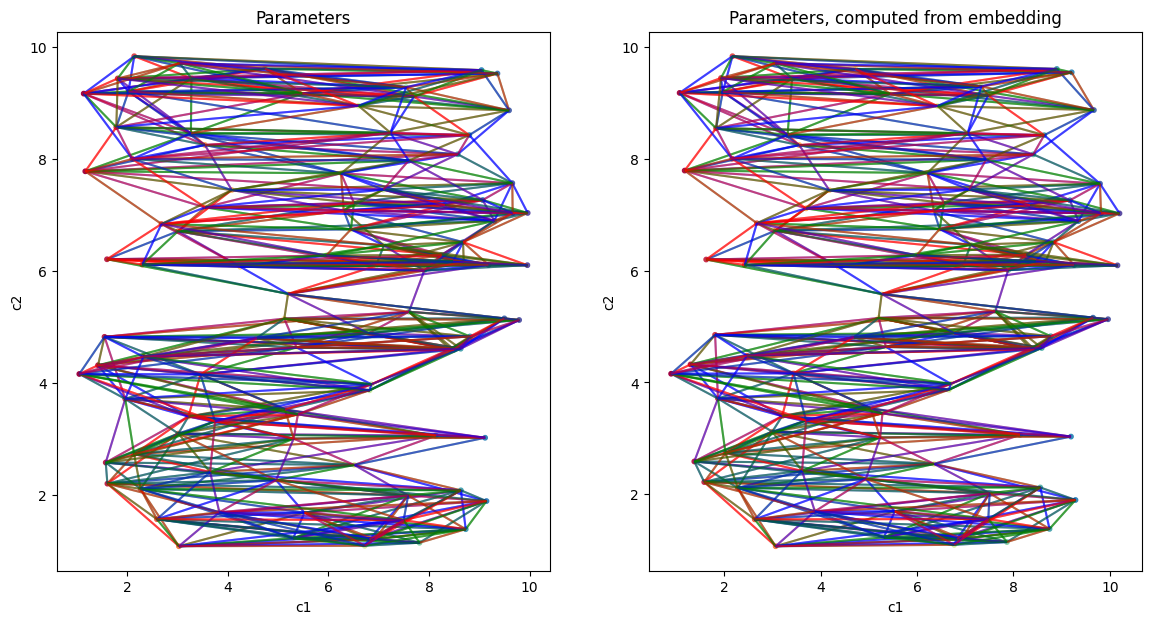

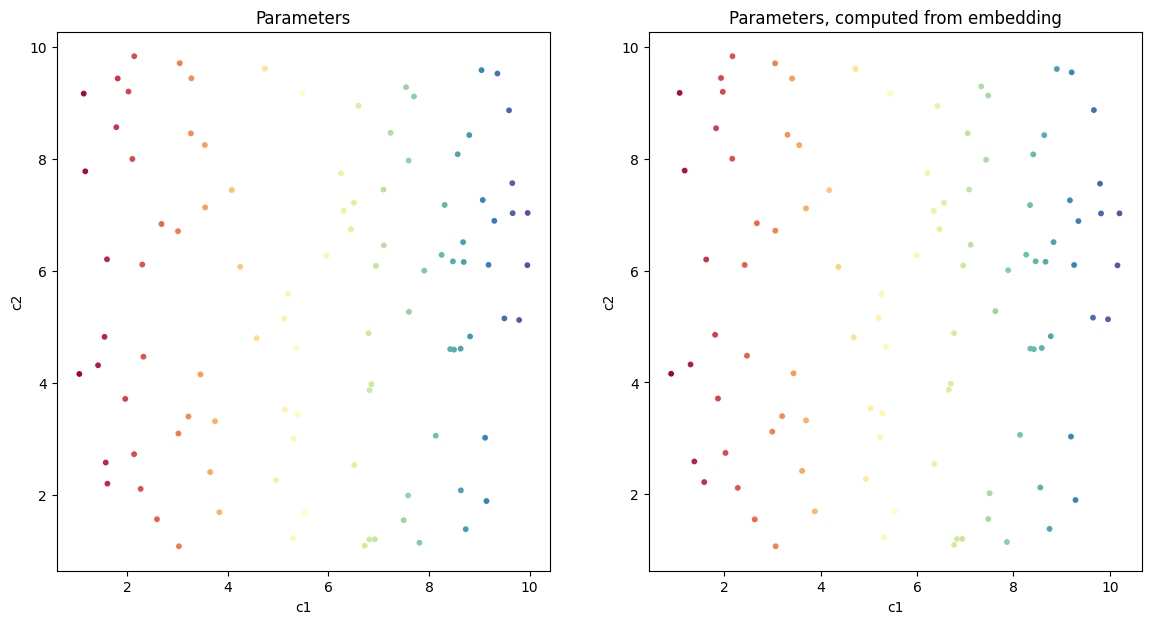

In [30]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [35]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt, noise_level, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [3.14094931 1.12288039], x_err = 2.7529090846217223e-11
x_real = [1.54054394 1.25650047]
Finding neighbors: 0 ms , optimization: 0 ms
-----------
x_opt  = [3.05188703 1.1494133 ], x_err = 4.6355935172358845e-12
x_real = [1.73237785 1.27537747]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [2.71071464 1.59129741], x_err = 4.896132193228551e-12
x_real = [1.02528512 1.68704782]
Finding neighbors: 1 ms , optimization: 0 ms
-----------
x_opt  = [2.56884212 1.57394622], x_err = 3.389613846240129e-14
x_real = [1.34946777 1.46330086]
Finding neighbors: 0 ms , optimization: 0 ms
-----------
x_opt  = [2.60276073 1.58248477], x_err = 7.993439096436862e-12
x_real = [1.71239852 1.63296221]
Finding neighbors: 0 ms , optimization: 0 ms
-----------
x_opt  = [2.57521501 1.54094592], x_err = 4.192599947895735e-15
x_real = [1.53772407 1.47998666]
Finding neighbors: 0 ms , optimization: 0 ms
-----------
x_opt  = [2.64309

In [33]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, roll_generator.generate_swiss_roll, figure_point_cnt, noise_level, pieces_cnt=10, test_data_size=20, same_value=False, baseline=True)

-----------
x_opt  = [2.27249555 2.11409447], x_err = 3.284655763848687e-06
x_real = [1.86768361 1.87443975]
-----------
x_opt  = [3.03282075 1.09172135], x_err = 1.5773469380776703e-06
x_real = [1.65423822 1.27159171]
-----------
x_opt  = [2.59643834 1.57381128], x_err = 8.17381405799322e-07
x_real = [1.37820188 1.40638167]
-----------
x_opt  = [3.03282075 1.09172135], x_err = 1.85556092198361e-06
x_real = [1.26319699 1.19008699]
-----------
x_opt  = [3.03282075 1.09172135], x_err = 1.635638504525383e-06
x_real = [1.79899812 1.29816054]
-----------
x_opt  = [2.27249555 2.11409447], x_err = 5.152923658331606e-06
x_real = [1.17504519 1.86054347]
-----------
x_opt  = [3.03282075 1.09172135], x_err = 2.058330014238419e-06
x_real = [1.55981532 1.2865832 ]
-----------
x_opt  = [3.03282075 1.09172135], x_err = 6.71066129747058e-07
x_real = [1.56158612 1.07134595]
-----------
x_opt  = [3.03282075 1.09172135], x_err = 2.437673754996945e-06
x_real = [1.0098086  1.09047131]
-----------
x_opt  = 

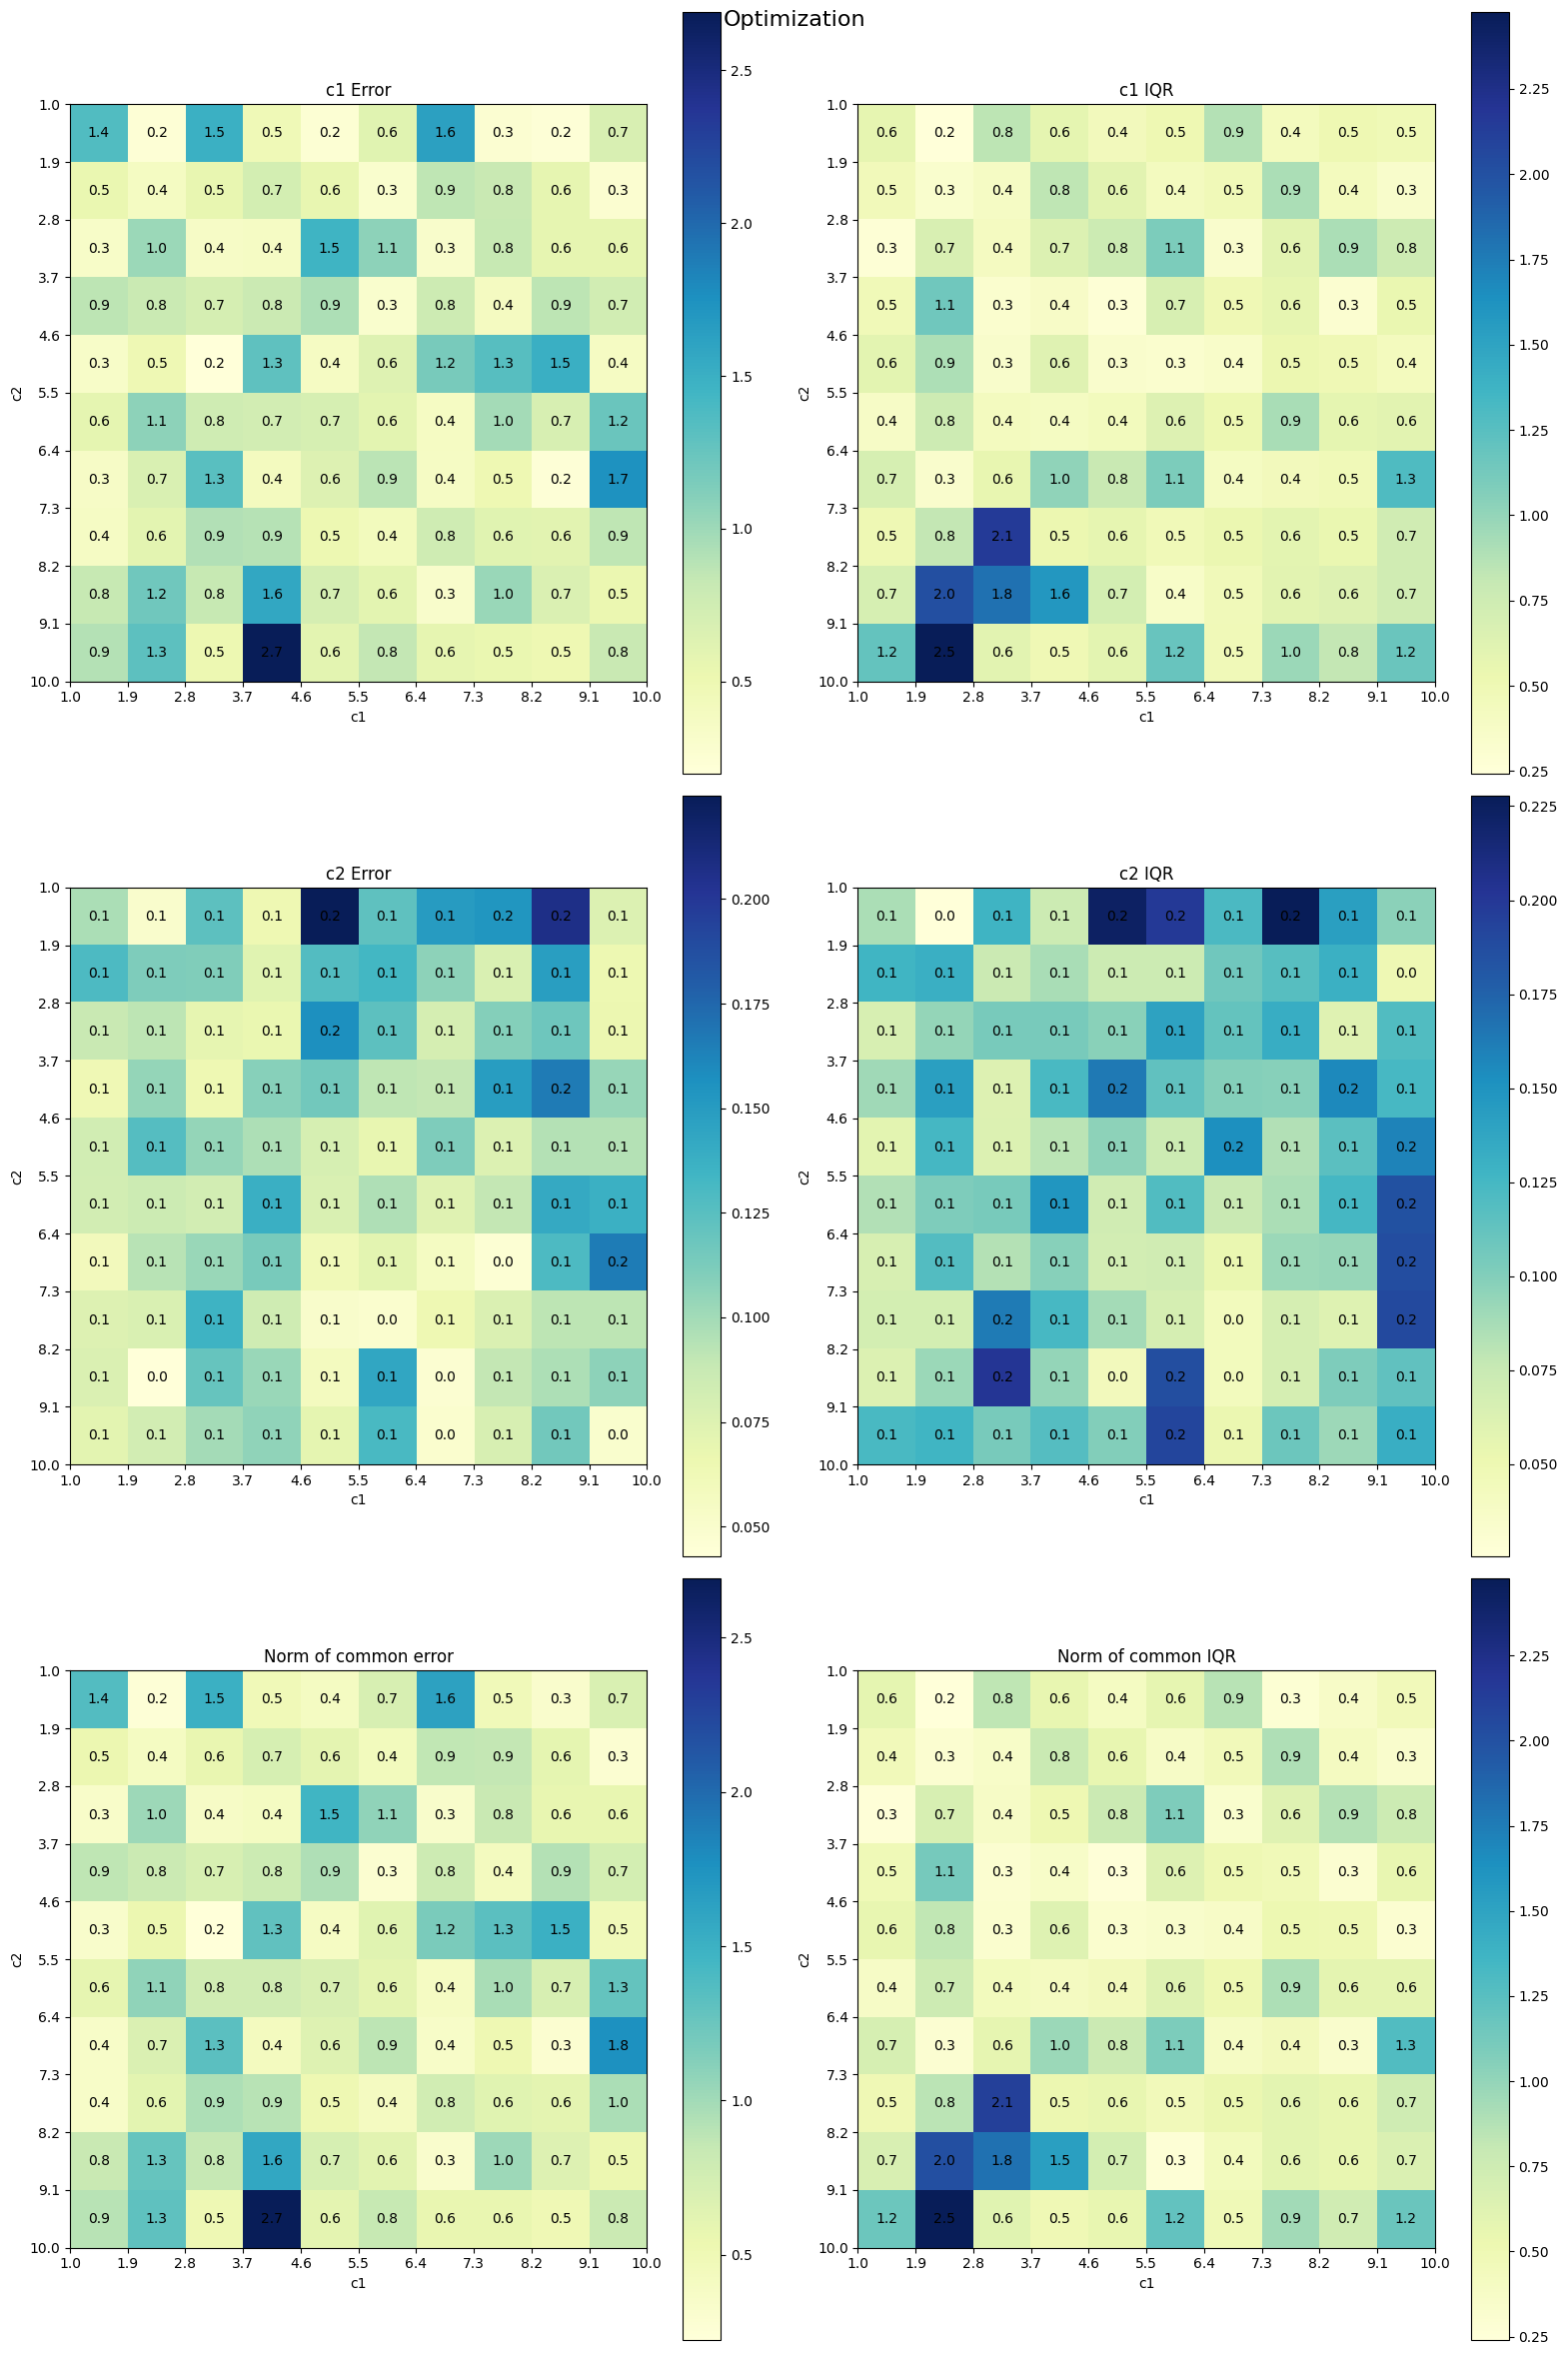

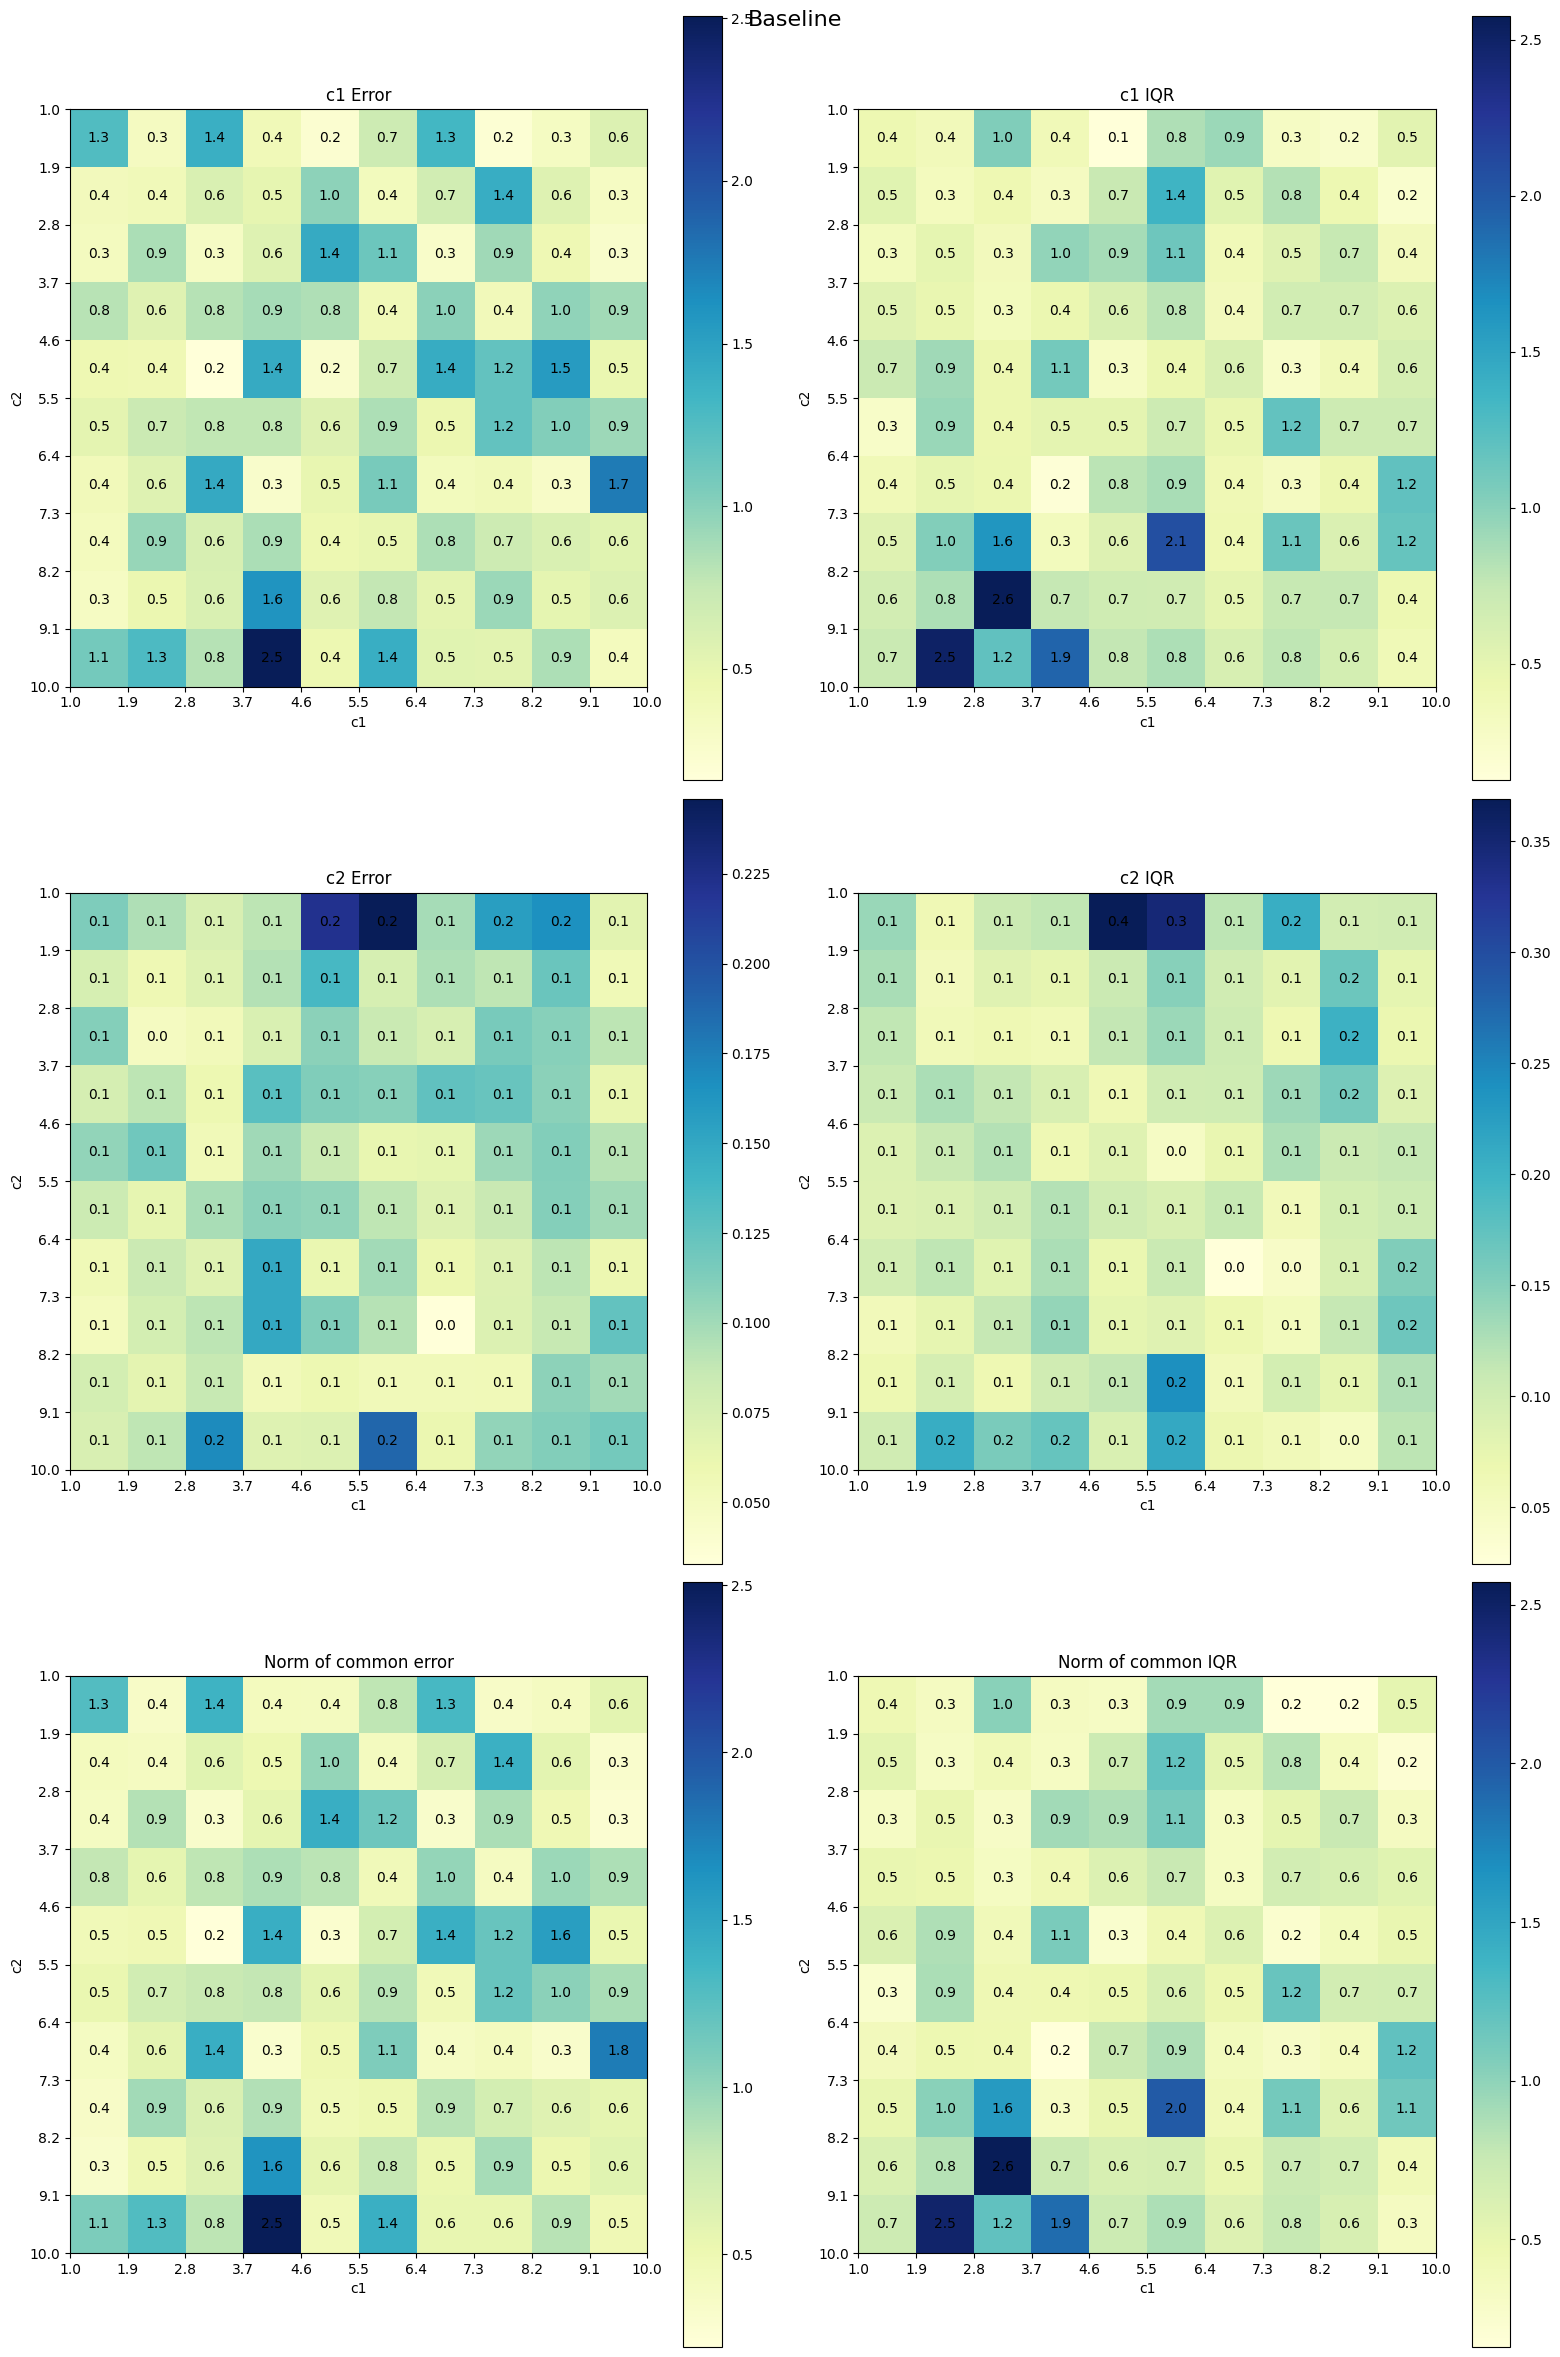

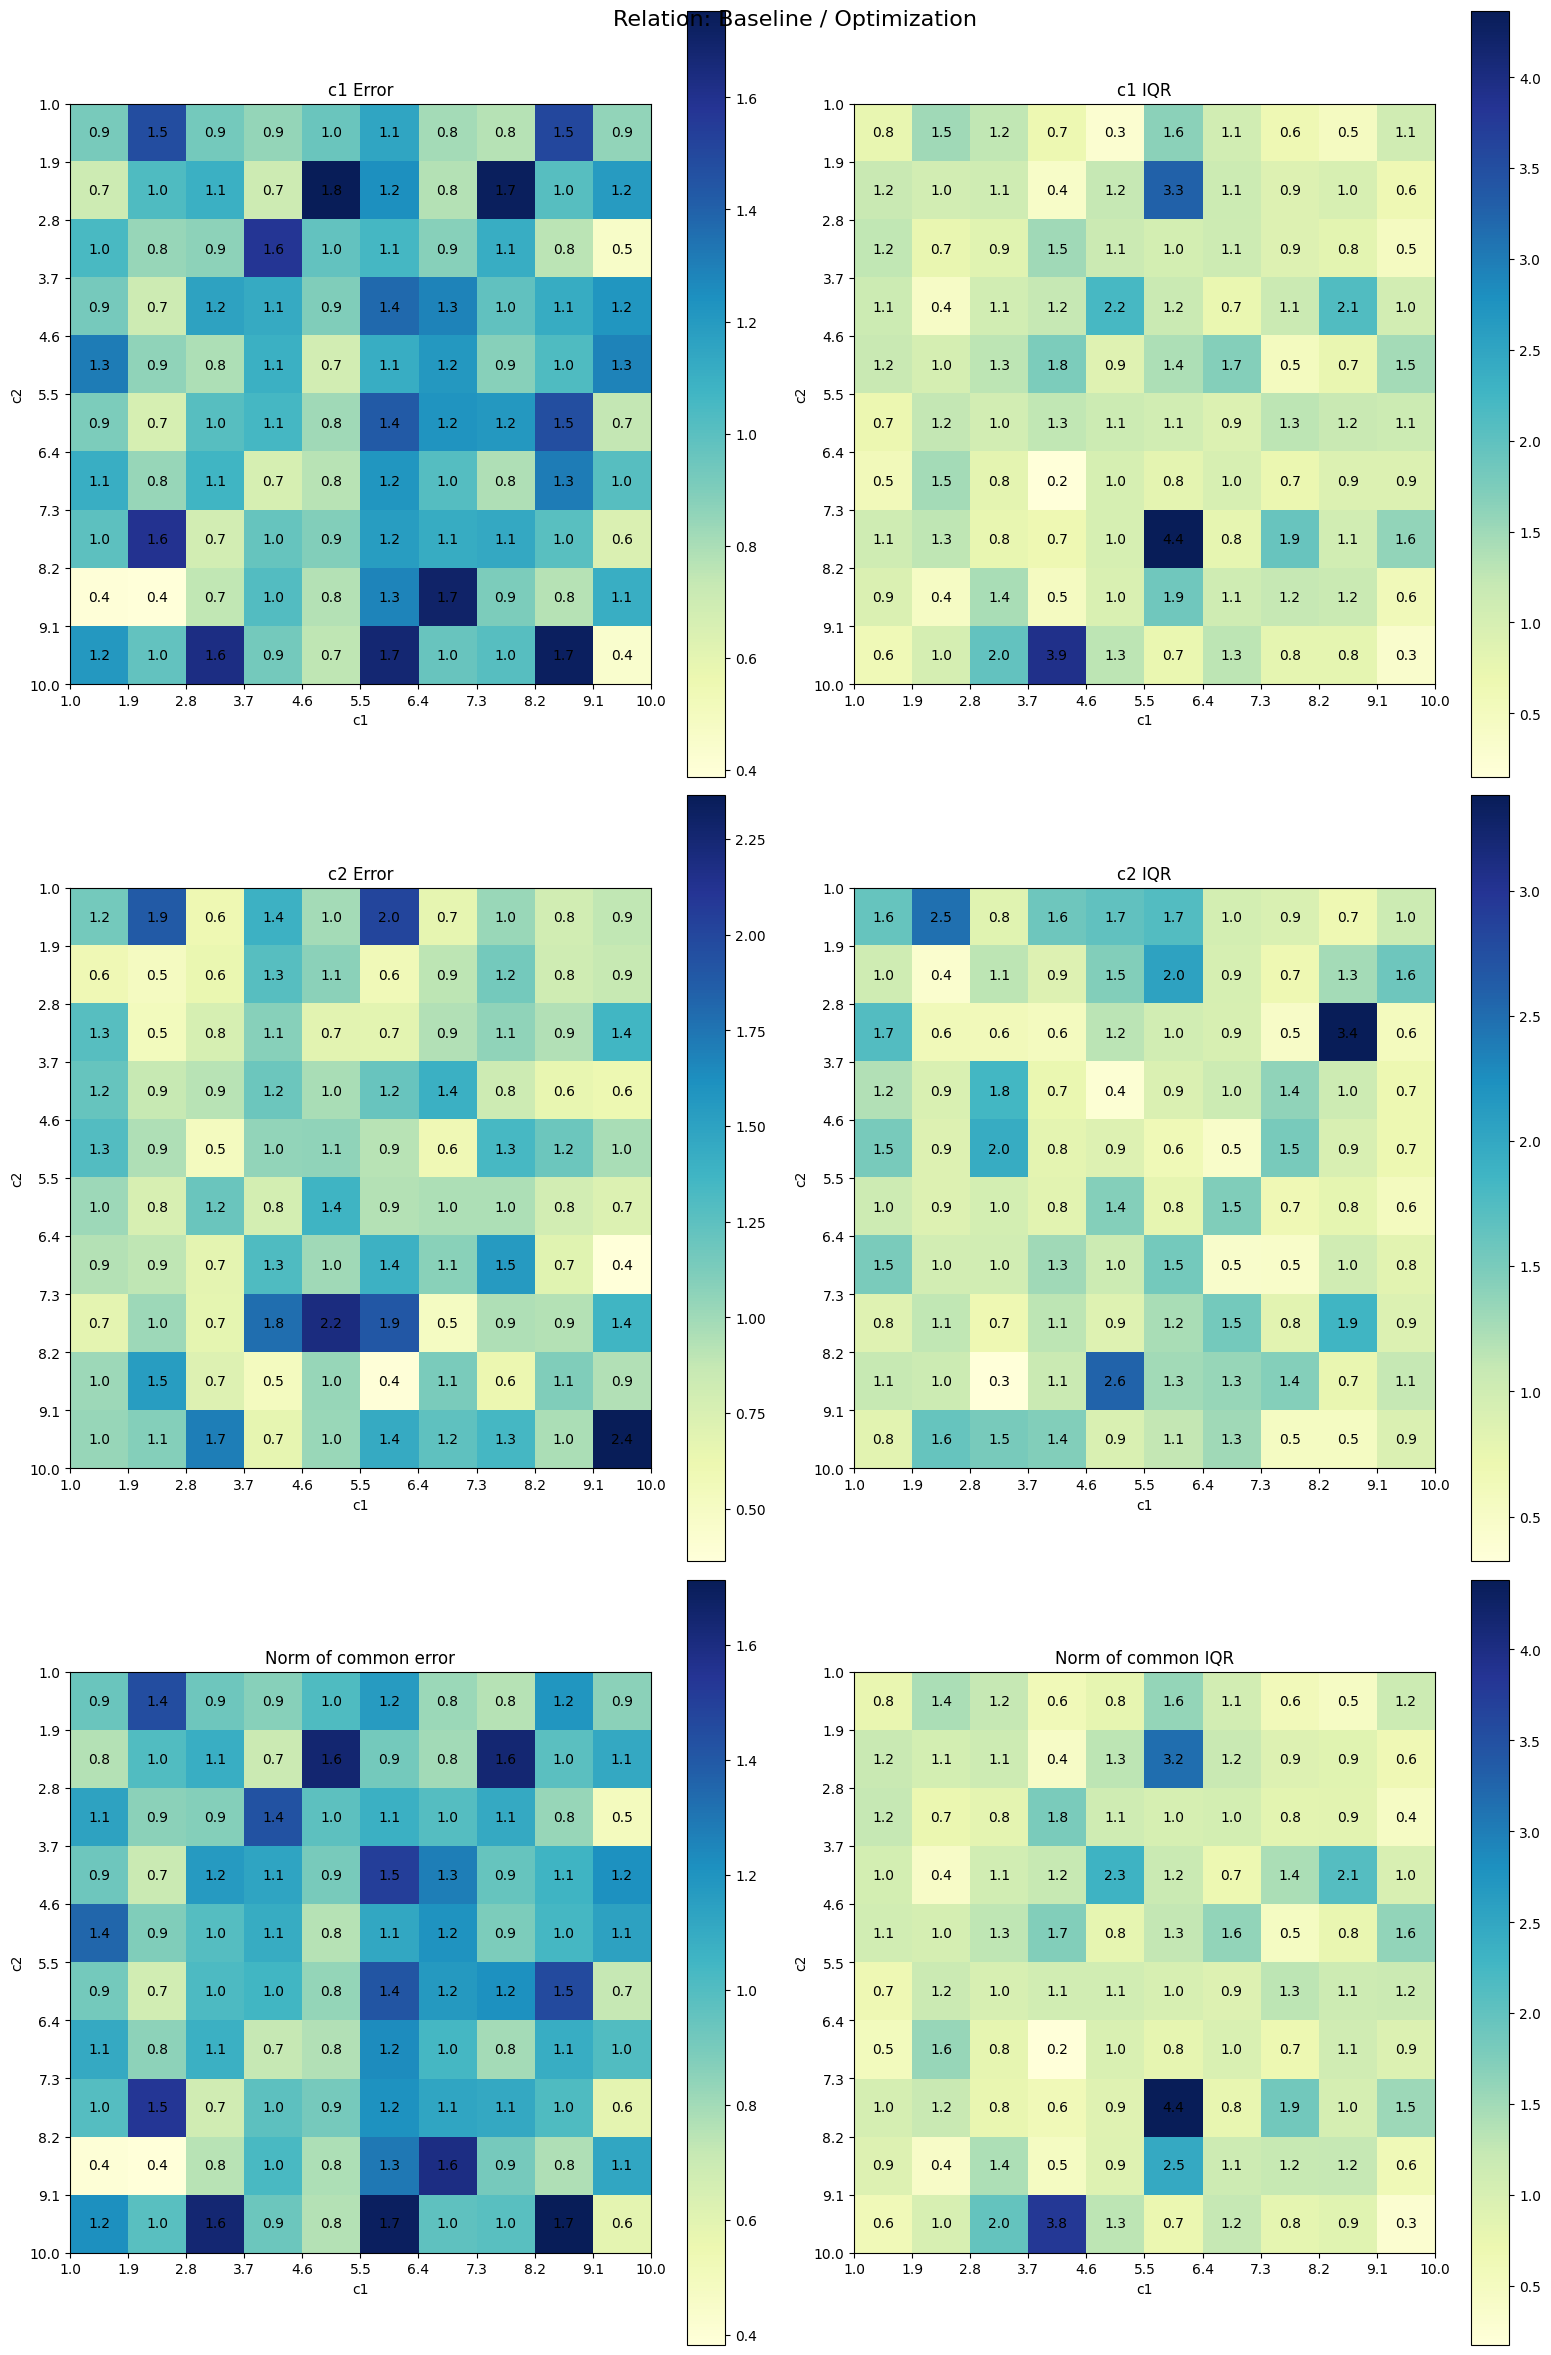

In [36]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/orig_roll.png", title="Optimization")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, filename="images/orig_roll_base.png", title="Baseline")
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/orig_roll_rel.png", title="Relation: Baseline / Optimization")

1.0972398747607892 10.549872962239014 0.8386522585973912 10.522512166089331


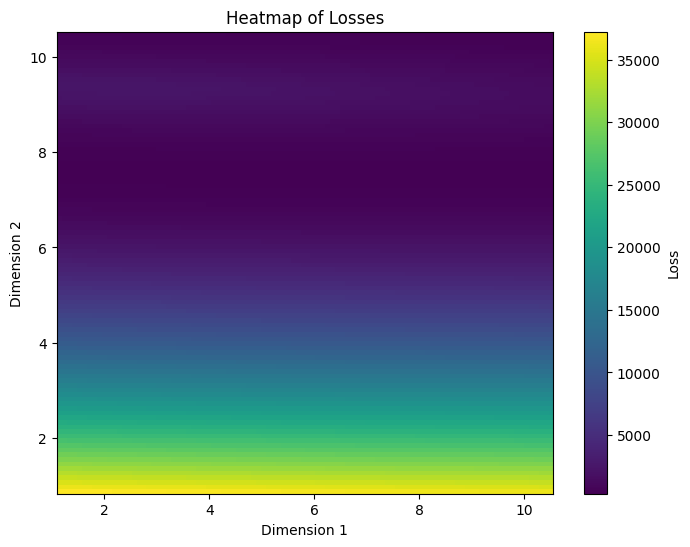

Finding neighbors: 1 ms , optimization: 160 ms
x_opt = [1.09723987 7.59656624], x_err = 395.9664821673472
x_real = [ 1 10]
1.0972398747607892 10.549872962239014 0.8386522585973912 10.522512166089331


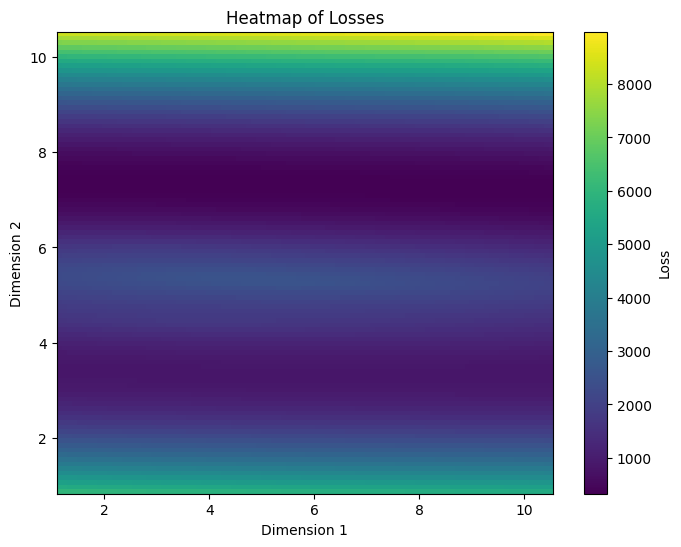

Finding neighbors: 1 ms , optimization: 163 ms
x_opt = [1.09723987 7.37637814], x_err = 327.5241225225957
x_real = [2 5]
1.0972398747607892 10.549872962239014 0.8386522585973912 10.522512166089331


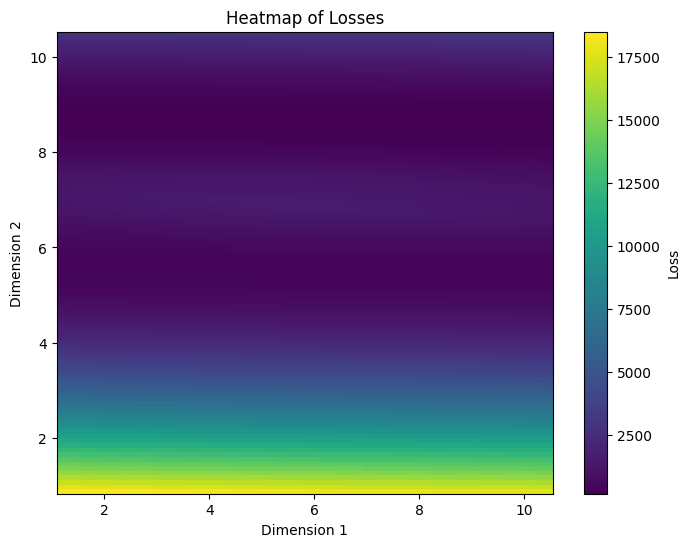

Finding neighbors: 1 ms , optimization: 168 ms
x_opt = [1.09723987 5.60537875], x_err = 383.76354118601796
x_real = [3 7]
1.0972398747607892 10.549872962239014 0.8386522585973912 10.522512166089331


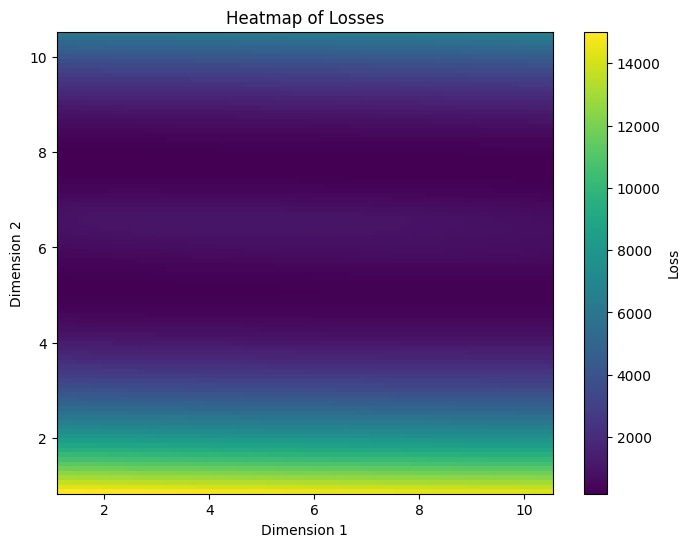

Finding neighbors: 1 ms , optimization: 171 ms
x_opt = [10.54987296  7.65775687], x_err = 175.39788294030345
x_real = [4 6]


In [7]:
test_control_vars = np.array([[1, 10], [2, 5], [3, 7], [4, 6]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, roll_generator.generate_swiss_roll,
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=5)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")